In [1]:
import sys
sys.path.append('../')
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from tqdm.auto import tqdm  # for easy progress bar
import os
import scienceplots
from util import get_trial_res, show_results, compare_results, plot_fullep_score, compare_depths
import json
# folder where the results are stored: 
#res_dir = "../../../../../surfdrive/Documents/Research/Result"
res_dir = "../result"
colors = [i for i in mcolors.TABLEAU_COLORS.keys()]

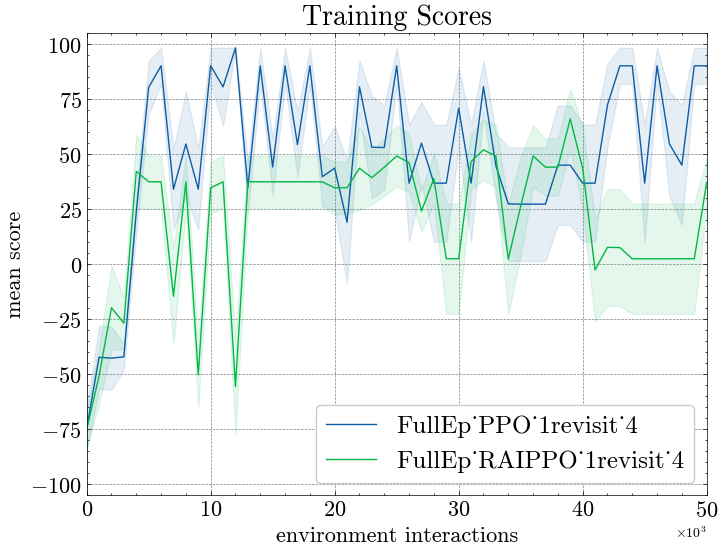

In [11]:
cases = [
    "FullEp_PPO_1revisit_4", 
    "FullEp_RAIPPO_1revisit_4"
    ]

scores = []
for case in cases:
    scores.append(pd.read_csv(f"{res_dir}/{case}/score.csv"))

figure = compare_results(cases, scores, style=['science', 'grid', 'no-latex'], nb_steps = 50_000)
figure.set_size_inches(8,6)

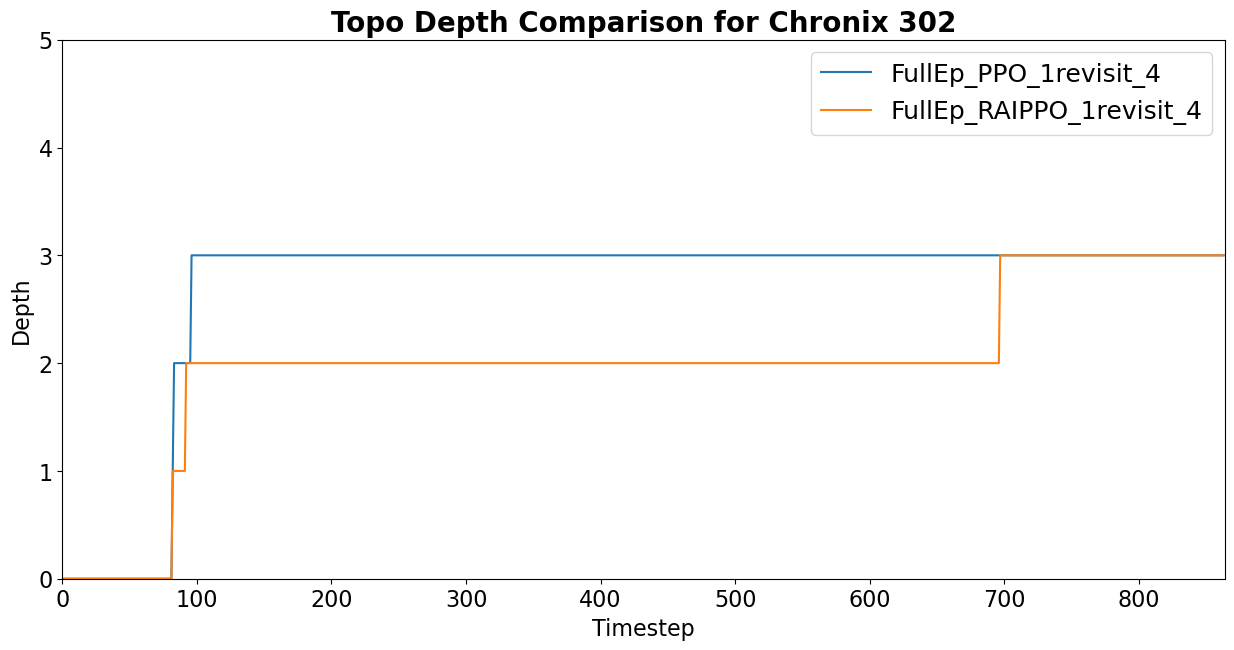

: 

In [12]:
cases = [
    "FullEp_PPO_1revisit_4", 
    "FullEp_RAIPPO_1revisit_4"
    ]

# Select a specific chronix for comparison
selected_chronix = 302

# Load the topo depth data for each agent
depth_data = []
for case in cases:
    depth_data.append(pd.read_csv(f"{res_dir}/{case}/eval_depths.csv"))

# Plot the topo depth for the selected chronix
depth_figure = compare_depths(cases, depth_data, chronix_name=selected_chronix, nb_steps=864, ymin=0, ymax=5, ylabel="Depth", title=f"Topo Depth Comparison for Chronix {selected_chronix}")
plt.show()

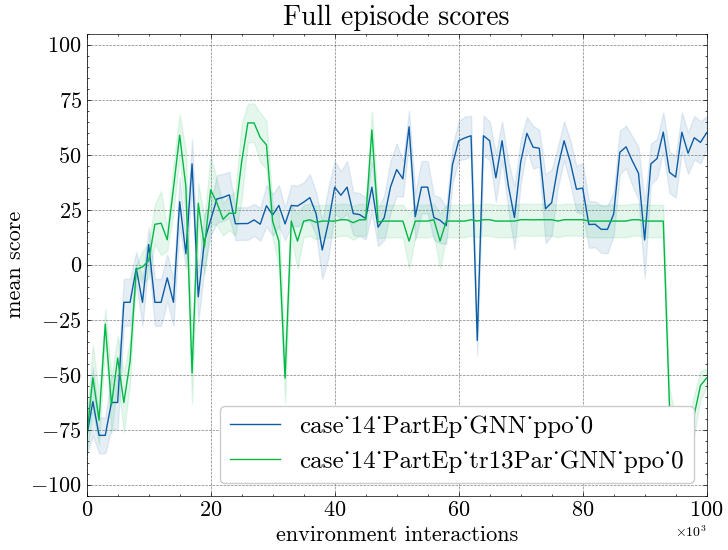

In [3]:
cases = [
    "case_14_PartEp_GNN_ppo_0", 
    "case_14_PartEp_tr13Par_GNN_ppo_0"
]

full_scores = []
for case in cases:
    full_scores.append(pd.read_csv(f"{res_dir}/{case}/full_score.csv"))
    full_scores[-1] = full_scores[-1].rename(columns={"Env_Interactions": "env_interactions"})

figure = compare_results(cases, full_scores, style=['science', 'grid', 'no-latex'], nb_steps = 100_000, title="Full episode scores")
figure.set_size_inches(8,6)

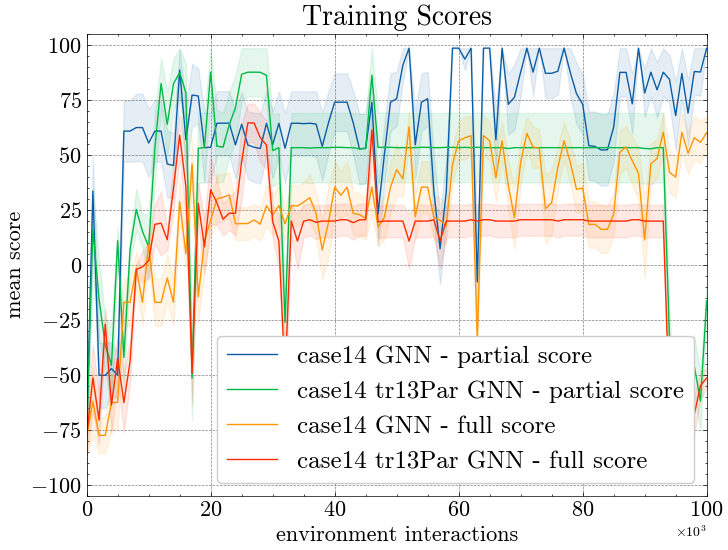

In [5]:
all_scores = scores + full_scores
all_cases = [
    "case14 GNN - partial score", 
    "case14 tr13Par GNN - partial score",
    "case14 GNN - full score", 
    "case14 tr13Par GNN - full score",
]
figure = compare_results(all_cases, all_scores, style=['science', 'grid', 'no-latex'], nb_steps = 100_000)
figure.set_size_inches(8,6)

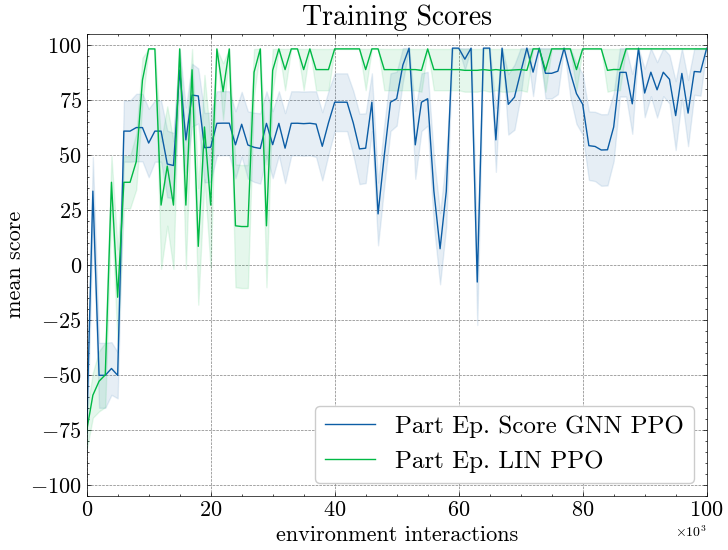

In [6]:
cases = [
    "case_14_PartEp_GNN_ppo_0", 
    "case_14_PartEp_tr13Par_LIN_ppo_0"
]

scores = []
full_scores = []
for case in cases:
    scores.append(pd.read_csv(f"{res_dir}/{case}/score.csv"))  
    
    full_scores.append(pd.read_csv(f"{res_dir}/{case}/full_score.csv"))
    full_scores[-1] = full_scores[-1].rename(columns={"Env_Interactions": "env_interactions"})

cases = [
    "Part Ep. Score GNN PPO", 
    "Part Ep. LIN PPO"
]
figure = compare_results(cases, scores, style=['science', 'grid', 'no-latex'], nb_steps = 100_000)
figure.set_size_inches(8,6)

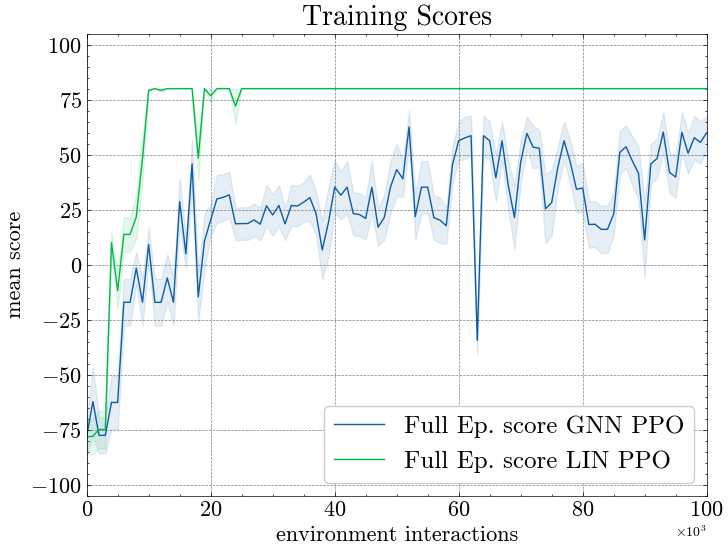

In [9]:
cases = [
    "Full Ep. score GNN PPO", 
    "Full Ep. score LIN PPO"
]
figure = compare_results(cases, full_scores, style=['science', 'grid', 'no-latex'], nb_steps = 100_000)
figure.set_size_inches(8,6)

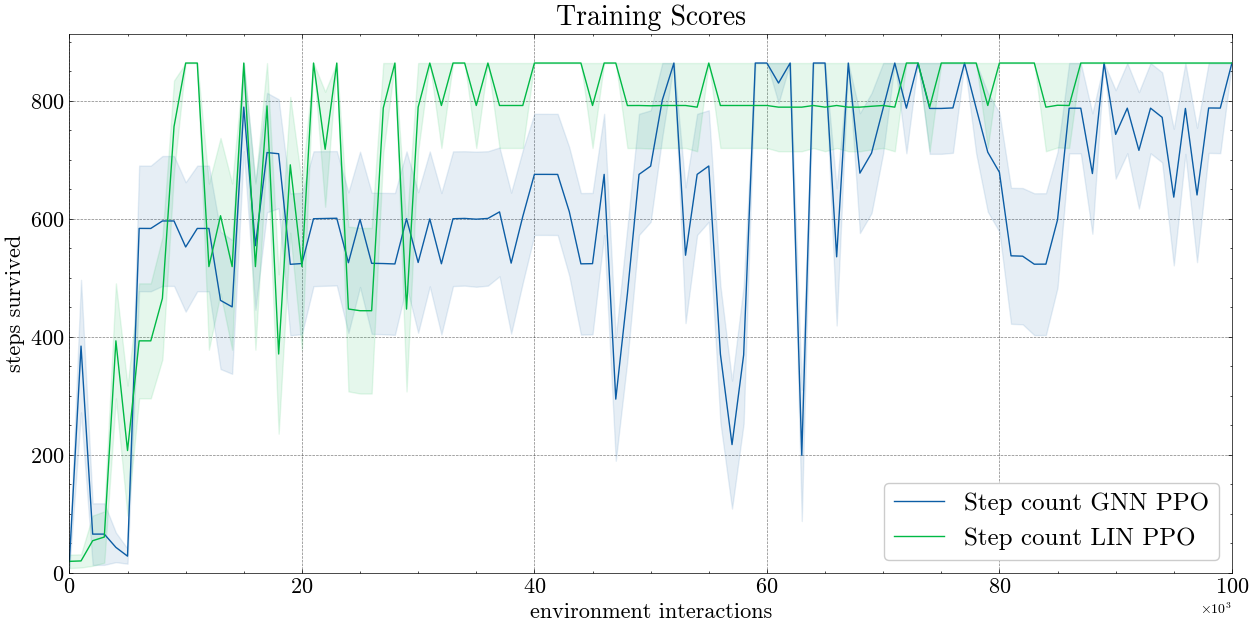

In [17]:
cases = [
    "case_14_PartEp_GNN_ppo_0", 
    "case_14_PartEp_tr13Par_LIN_ppo_0"
]

steps = []
for case in cases:
    steps.append(pd.read_csv(f"{res_dir}/{case}/step.csv", names=full_scores[-1].columns[1::]))
    steps[-1]["env_interactions"] = full_scores[-1]["env_interactions"]

cases = [
    "Step count GNN PPO", 
    "Step count LIN PPO"
]
max_steps = steps[-1].iloc[:, :-1].max().max() + 50

figure = compare_results(cases, steps, style=['science', 'grid', 'no-latex'], nb_steps = 100_000, ymin=0, ymax=max_steps, ylabel="steps survived")

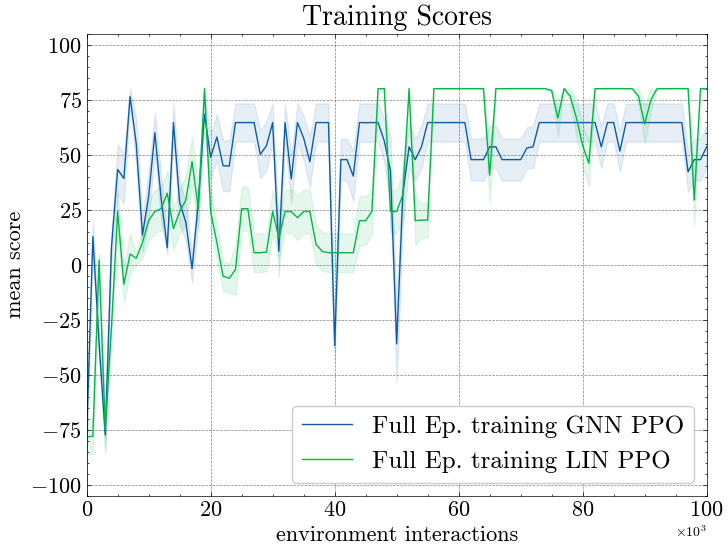

In [12]:
cases = [
    "case_14_FullEp_ppo_0",
    "case_14_FullEp_tr13Par_LIN_ppo_0", 
]

full_scores = []
for case in cases:
    full_scores.append(pd.read_csv(f"{res_dir}/{case}/full_score.csv"))
    full_scores[-1] = full_scores[-1].rename(columns={"Env_Interactions": "env_interactions"})

cases = [
    "Full Ep. training GNN PPO", 
    "Full Ep. training LIN PPO"
]
figure = compare_results(cases, full_scores, style=['science', 'grid', 'no-latex'], nb_steps = 100_000)
figure.set_size_inches(8,6)

In [13]:
steps = pd.read_csv(f"{res_dir}/{case}/step.csv")
steps

,3,379,3.1,374,155,3.2,3.3,3.4,224,413
0,3,381,3,374,185,3,3,3,224,415
1,809,968,1006,521,809,520,806,519,507,3398
2,3,381,3,374,432,3,3,3,224,415
3,671,768,528,539,810,226,521,369,374,529
4,1094,8064,1094,8064,1378,1671,1090,3109,515,3400
...,...,...,...,...,...,...,...,...,...,...
95,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064
96,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064
97,1094,8064,1095,8064,1379,1673,1091,3111,516,8064
98,8064,8064,8064,8064,8064,8064,8064,8064,8064,8064


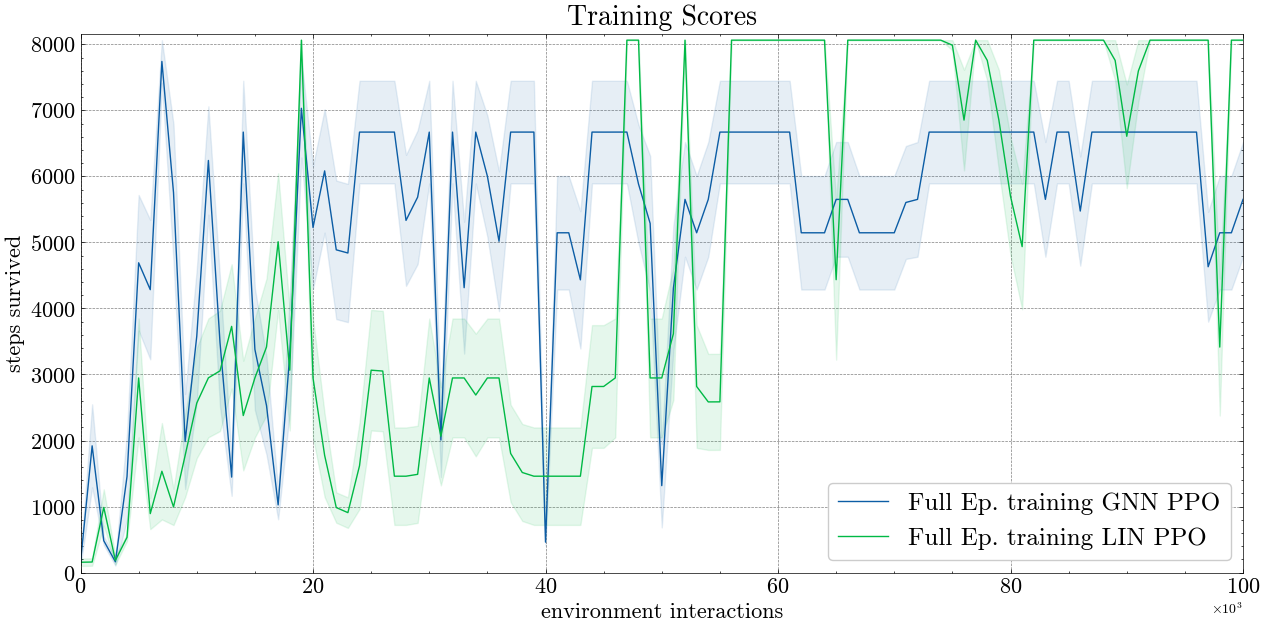

In [14]:
cases = [
    "case_14_FullEp_ppo_0",
    "case_14_FullEp_tr13Par_LIN_ppo_0", 
]

steps = []
for case in cases:
    steps.append(pd.read_csv(f"{res_dir}/{case}/step.csv", names=full_scores[-1].columns[1::]))
    steps[-1]["env_interactions"] = full_scores[-1]["env_interactions"]

cases = [
    "Full Ep. training GNN PPO", 
    "Full Ep. training LIN PPO"
]
max_steps = steps[-1].iloc[:, :-1].max().max() + 100

figure = compare_results(cases, steps, style=['science', 'grid', 'no-latex'], nb_steps = 100_000, ymin=0, ymax=max_steps, ylabel="steps survived")

In [16]:
full_scores[-1]

,env_interactions,Score_Ch0001,Score_Ch0101,Score_Ch0201,Score_Ch0301,Score_Ch0401,Score_Ch0501,Score_Ch0601,Score_Ch0701,Score_Ch0801,Score_Ch0901
0,0,-99.635384,-62.945984,-99.726504,-30.964062,-82.554210,-99.403566,-99.627147,-99.407359,-58.364223,-51.433866
1,1000,-99.635157,-62.718373,-99.726333,-30.963686,-78.929962,-99.403193,-99.626915,-99.406991,-58.363845,-51.155213
2,2000,0.023046,-0.009799,-8.039352,0.011474,0.011635,0.021592,-0.024853,0.021616,0.021726,28.407713
3,3000,-99.635157,-62.718373,-99.726333,-30.963686,-49.101833,-99.403193,-99.626915,-99.406991,-58.363845,-51.155213
4,4000,-18.434067,-20.740813,-53.857755,0.218639,0.023319,-58.586307,-37.068223,-32.131538,-28.632236,-35.590203
...,...,...,...,...,...,...,...,...,...,...,...
96,96000,79.936317,79.974293,79.957545,79.960261,79.948192,79.945330,79.939513,79.953375,79.930085,79.947828
97,97000,79.936385,79.971577,79.957683,79.957894,79.947776,79.940472,79.934495,79.951289,79.923971,79.940160
98,98000,3.239667,79.965878,0.121860,79.972304,6.448885,12.294749,3.191712,27.373658,0.126506,79.964979
99,99000,79.903893,79.972485,79.947841,79.943354,79.940482,79.931219,79.916707,79.933679,79.914409,79.923837
